## Tutorial 3 - Autoencoder Continued Training

In this example, we will demonstrate how a model that has been pretrained can be continued to train with new data. This is useful when you have a model that has been trained on a large dataset, and you want to fine-tune it to a new dataset. BUT, we demonstrate that this is not always a good idea.

In [12]:
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Load our pretrained model

In [13]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

### Load our new symbol and test the autoencoder on this new symbol

1/1 [==============================] - 0s 211ms/step
(1, 784)


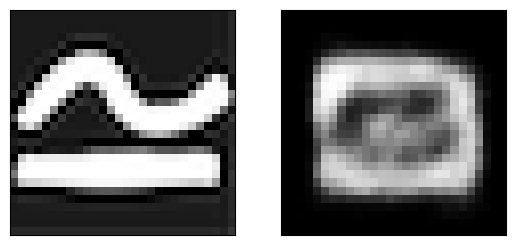

In [14]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('testimg02.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = pretrained_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()

As we can, this autoencoder doesn't do a good job with this new symbol.

### Try to continue training the model on the original 10 digits and with the new symbol mixed in   

Let's try to retrain the original model with a mix of the new symbol and the original 10. Our goal it so avoid retraining with the entire original test test, and instead only use a small subset of the original test set.

In [15]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [16]:
input_arr = input_arr.reshape(784)

np.random.shuffle(train_images)

bad_images = [input_arr for _ in range(135)]
new_image_set = np.vstack((train_images[:500], bad_images))
np.random.shuffle(new_image_set)

new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

In [19]:

new_images_test.shape

(508, 784)

In [9]:
from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

Epoch 1/15
1/1 [==============================] - 3s 3s/step - loss: 0.2648 - val_loss: 0.2379
Epoch 2/15
1/1 [==============================] - 0s 211ms/step - loss: 0.2416 - val_loss: 0.1980
Epoch 3/15
1/1 [==============================] - 0s 211ms/step - loss: 0.1994 - val_loss: 0.2089
Epoch 4/15
1/1 [==============================] - 0s 178ms/step - loss: 0.2107 - val_loss: 0.1986
Epoch 5/15
1/1 [==============================] - 0s 178ms/step - loss: 0.1979 - val_loss: 0.1912
Epoch 6/15
1/1 [==============================] - 0s 162ms/step - loss: 0.1889 - val_loss: 0.1892
Epoch 7/15
1/1 [==============================] - 0s 170ms/step - loss: 0.1857 - val_loss: 0.1792
Epoch 8/15
1/1 [==============================] - 0s 173ms/step - loss: 0.1740 - val_loss: 0.1734
Epoch 9/15
1/1 [==============================] - 0s 180ms/step - loss: 0.1668 - val_loss: 0.1692
Epoch 10/15
1/1 [==============================] - 0s 169ms/step - loss: 0.1618 - val_loss: 0.1638
Epoch 11/15
1/1 [=====

### Test the model on the original test set

313/313 [==============================] - 3s 10ms/step


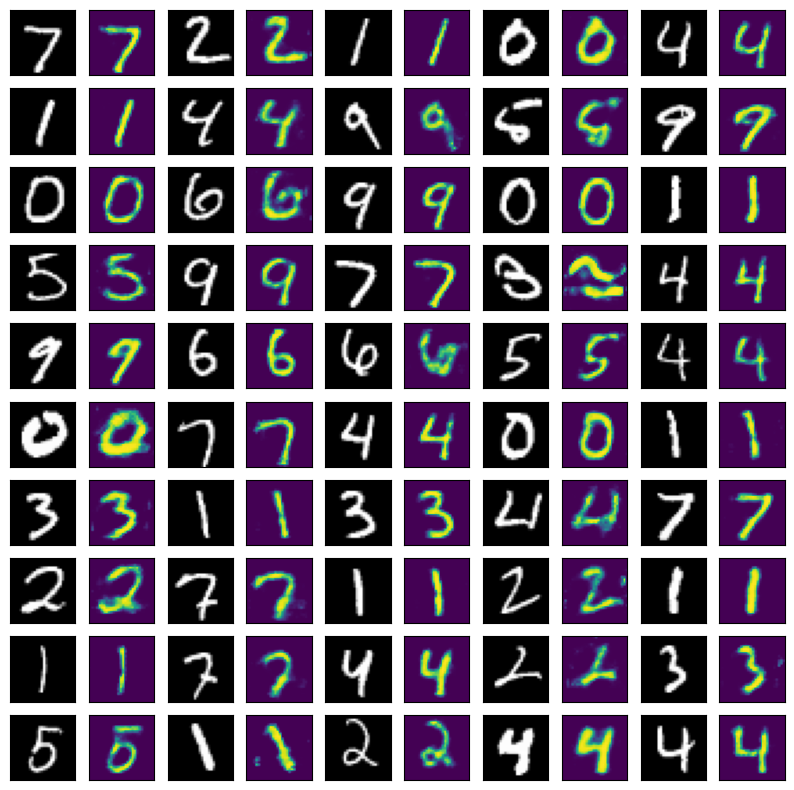

In [10]:
reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Test the model on the new test set

1/1 [==============================] - 0s 51ms/step
(1, 784)


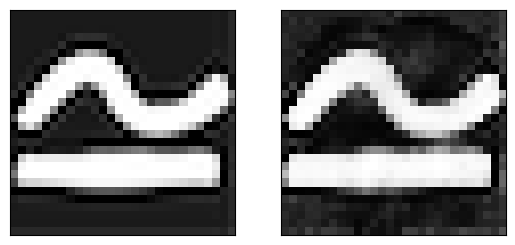

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('testimg02.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


### Summary 

If we try to transfer previous learning to our model and avoid a large retraining process, retraining the autoencoder with new data is tricky. We must deal with the problem of 'forgetting' the original digits, while 'remembering' new digits. 